# BANA 6043 - Final Project 
---

## Group 7

- **Neranjan**
- **Preetham**
- **Shivani**
- **Jayavardhan**

## Importing Libraries and Dataset

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
## Machine Learning 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [2]:
df = pd.read_csv("SuddenCardiacArrest.csv")

## Exploratory Data Analysis

In [3]:
df.head()

,PatientName,Age,Sex,ECG-Resting,ST-Slope,BloodPressure-Resting,HeartRate-Max,ChestPainType,Cholesterol,BloodSugar-Fasting,ExerciseAngina,OldPeak,SCA
0,Patient 1,40,M,Normal,Up,140,172,ATA,289,Normal,N,0.0,0
1,Patient 2,49,F,Normal,Flat,160,156,NAP,180,Normal,N,1.0,1
2,Patient 3,37,M,ST,Up,130,98,ATA,283,Normal,N,0.0,0
3,Patient 4,48,F,Normal,Flat,138,108,ASY,214,Normal,Y,1.5,1
4,Patient 5,54,M,Normal,Up,150,122,NAP,195,Normal,N,0.0,0


In [4]:
df = df.drop(['PatientName'], axis=1)
df.head()

,Age,Sex,ECG-Resting,ST-Slope,BloodPressure-Resting,HeartRate-Max,ChestPainType,Cholesterol,BloodSugar-Fasting,ExerciseAngina,OldPeak,SCA
0,40,M,Normal,Up,140,172,ATA,289,Normal,N,0.0,0
1,49,F,Normal,Flat,160,156,NAP,180,Normal,N,1.0,1
2,37,M,ST,Up,130,98,ATA,283,Normal,N,0.0,0
3,48,F,Normal,Flat,138,108,ASY,214,Normal,Y,1.5,1
4,54,M,Normal,Up,150,122,NAP,195,Normal,N,0.0,0


In [5]:
print("The Rows and columns of the given Dataset is,", df.shape[0], "&",df.shape[1])

The Rows and columns of the given Dataset is, 1221 & 12


In [6]:
print(f'''The Datatypes of the given Dataset are

{df.dtypes}
''')

The Datatypes of the given Dataset are

Age                        int64
Sex                       object
ECG-Resting               object
ST-Slope                  object
BloodPressure-Resting      int64
HeartRate-Max              int64
ChestPainType             object
Cholesterol                int64
BloodSugar-Fasting        object
ExerciseAngina            object
OldPeak                  float64
SCA                        int64
dtype: object



In [7]:
print(f'''The Summary of the given Dataset is

{df.describe()}
''')

The Summary of the given Dataset is

               Age  BloodPressure-Resting  HeartRate-Max  Cholesterol  \
count  1221.000000            1221.000000    1221.000000  1221.000000   
mean     53.741196             132.221130     139.985258   210.684685   
std       9.341351              18.286927      25.443021   100.425185   
min      28.000000               0.000000      60.000000     0.000000   
25%      47.000000             120.000000     122.000000   188.000000   
50%      54.000000             130.000000     141.000000   228.000000   
75%      60.000000             140.000000     160.000000   269.000000   
max      77.000000             200.000000     202.000000   603.000000   

           OldPeak          SCA  
count  1221.000000  1221.000000  
mean      0.925143     0.529894  
std       1.092282     0.499310  
min      -2.600000     0.000000  
25%       0.000000     0.000000  
50%       0.600000     1.000000  
75%       1.600000     1.000000  
max       6.200000     1.000000  

In [8]:
correlation_matrix = df.corr(numeric_only=True)
correlation_matrix

,Age,BloodPressure-Resting,HeartRate-Max,Cholesterol,OldPeak,SCA
Age,1.000000,0.260453,-0.365635,-0.044118,0.246137,0.263155
BloodPressure-Resting,0.260453,1.000000,-0.098734,0.096168,0.169360,0.118848
HeartRate-Max,-0.365635,-0.098734,1.000000,0.237573,-0.186092,-0.410642
Cholesterol,-0.044118,0.096168,0.237573,1.000000,0.058818,-0.195832
OldPeak,0.246137,0.169360,-0.186092,0.058818,1.000000,0.402079
SCA,0.263155,0.118848,-0.410642,-0.195832,0.402079,1.000000


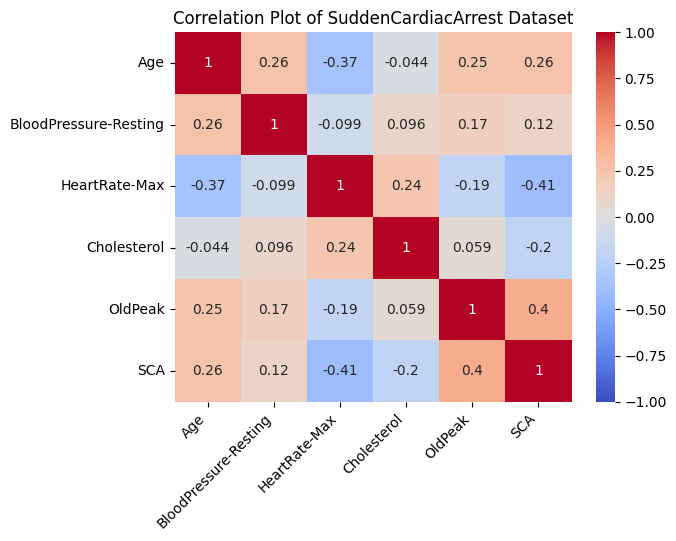

In [35]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Plot of SuddenCardiacArrest Dataset')
plt.xticks(rotation=45, ha="right")
plt.show()

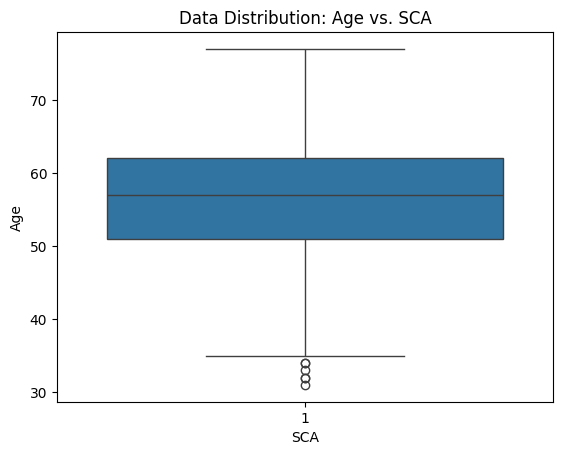

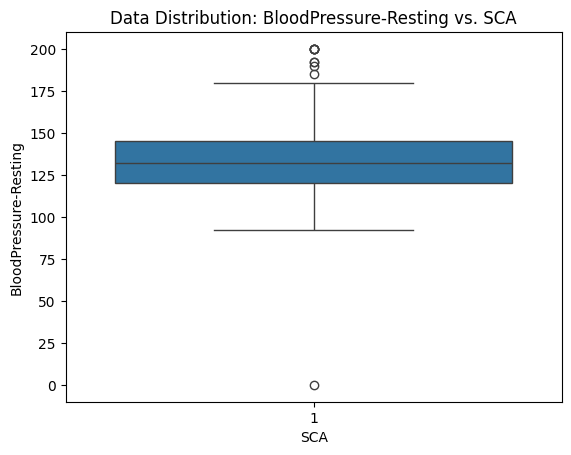

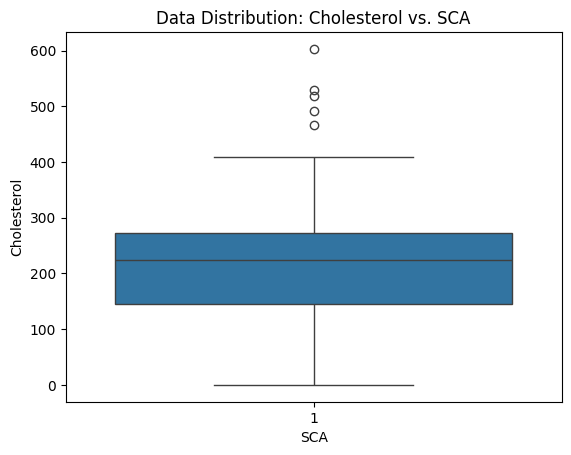

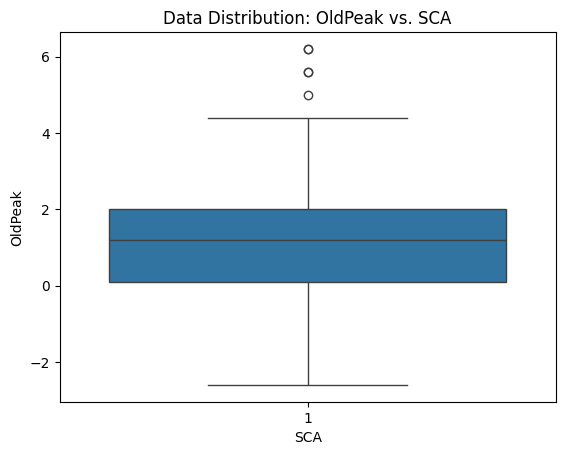

In [10]:
cardiacArrested_df = df[df['SCA'] == 1]
for parameter in ['Age', 'BloodPressure-Resting', 'Cholesterol', 'OldPeak']:
    sns.boxplot(x='SCA', y=parameter, data=cardiacArrested_df)
    plt.title(f'Data Distribution: {parameter} vs. SCA')
    plt.show()

## Data Pre-Processing and Wrangling

In [11]:
df.isnull().sum()

Age                      0
Sex                      0
ECG-Resting              0
ST-Slope                 0
BloodPressure-Resting    0
HeartRate-Max            0
ChestPainType            0
Cholesterol              0
BloodSugar-Fasting       0
ExerciseAngina           0
OldPeak                  0
SCA                      0
dtype: int64

In [12]:
duplicate_rows = df.duplicated().sum()
print(f"There are {duplicate_rows} duplicate rows")

There are 303 duplicate rows


In [13]:
df = df.drop_duplicates()
df.duplicated().sum()

0

In [14]:
df['Age'].describe()

count    918.000000
mean      53.510893
std        9.432617
min       28.000000
25%       47.000000
50%       54.000000
75%       60.000000
max       77.000000
Name: Age, dtype: float64

In [15]:
df['Age_Quarter'] = pd.cut(df['Age'], bins=[25, 50, 75, 100], labels=['Q2', 'Q3', 'Q4'], right=False)
df['Age_Quarter'].unique()

['Q2', 'Q3', 'Q4']
Categories (3, object): ['Q2' < 'Q3' < 'Q4']

In [16]:
df.shape

(918, 13)

In [17]:
for parameter in ['Age', 'BloodPressure-Resting', 'Cholesterol', 'OldPeak']:
        z_scores = stats.zscore(df[parameter])
        outliers = (np.abs(z_scores) > 3)
        outlier_count = outliers[outliers].values.size
        print(f"{parameter} : {outlier_count}")

Age : 0
BloodPressure-Resting : 8
Cholesterol : 3
OldPeak : 7


In [18]:
for parameter in ['BloodPressure-Resting', 'Cholesterol', 'OldPeak']:
        z_scores = stats.zscore(df[parameter])
        outliers = (np.abs(z_scores) > 3)
        df = df[~outliers]
        print(f"Removed outliers in {parameter}")

Removed outliers in BloodPressure-Resting
Removed outliers in Cholesterol
Removed outliers in OldPeak


In [19]:
df.shape

(900, 13)

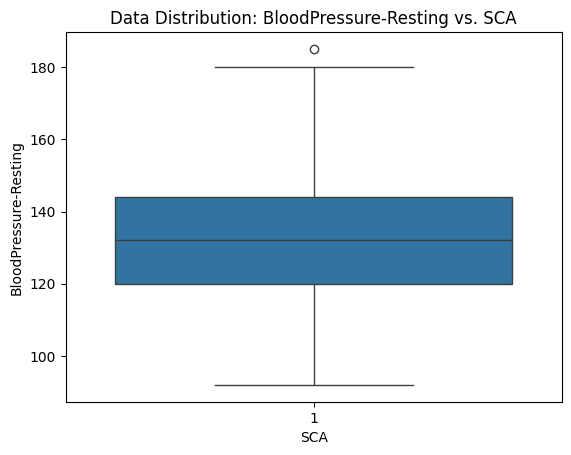

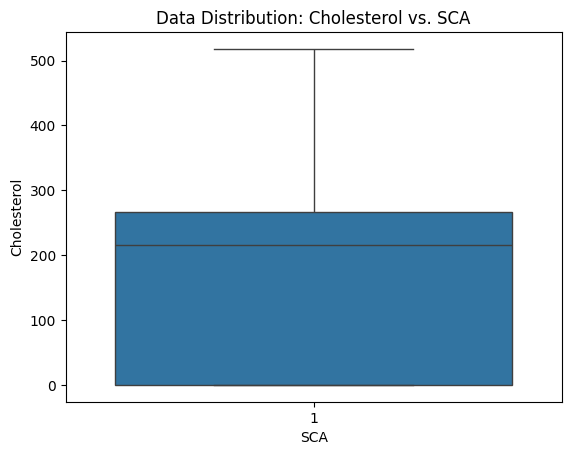

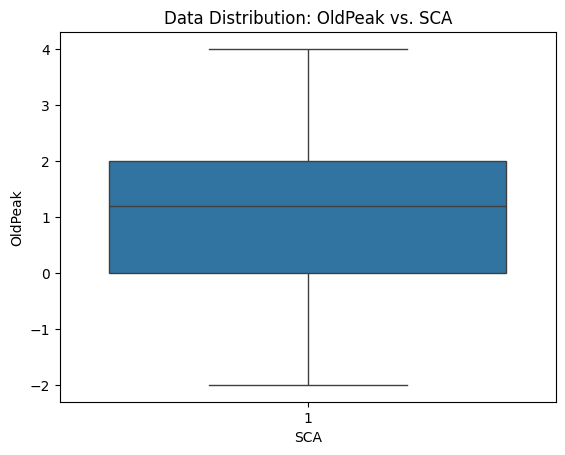

In [20]:
cardiacArrested_df = df[df['SCA'] == 1]
for parameter in ['BloodPressure-Resting', 'Cholesterol', 'OldPeak']:
    sns.boxplot(x='SCA', y=parameter, data=cardiacArrested_df)
    plt.title(f'Data Distribution: {parameter} vs. SCA')
    plt.show()

In [21]:
for parameter in df.columns:
    print(f"Column {parameter} has", df[parameter].unique().size, "unique values")

Column Age has 50 unique values
Column Sex has 2 unique values
Column ECG-Resting has 3 unique values
Column ST-Slope has 3 unique values
Column BloodPressure-Resting has 63 unique values
Column HeartRate-Max has 117 unique values
Column ChestPainType has 4 unique values
Column Cholesterol has 219 unique values
Column BloodSugar-Fasting has 2 unique values
Column ExerciseAngina has 2 unique values
Column OldPeak has 47 unique values
Column SCA has 2 unique values
Column Age_Quarter has 3 unique values


In [22]:
df = pd.get_dummies(df, columns=['Sex','ECG-Resting','ST-Slope','ChestPainType','BloodSugar-Fasting', 'ExerciseAngina','Age_Quarter'])
df.head()

,Age,BloodPressure-Resting,HeartRate-Max,Cholesterol,OldPeak,SCA,Sex_F,Sex_M,ECG-Resting_LVH,ECG-Resting_Normal,...,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,BloodSugar-Fasting_High,BloodSugar-Fasting_Normal,ExerciseAngina_N,ExerciseAngina_Y,Age_Quarter_Q2,Age_Quarter_Q3,Age_Quarter_Q4
0,40,140,172,289,0.0,0,0,1,0,1,...,1,0,0,0,1,1,0,1,0,0
1,49,160,156,180,1.0,1,1,0,0,1,...,0,1,0,0,1,1,0,1,0,0
2,37,130,98,283,0.0,0,0,1,0,0,...,1,0,0,0,1,1,0,1,0,0
3,48,138,108,214,1.5,1,1,0,0,1,...,0,0,0,0,1,0,1,1,0,0
4,54,150,122,195,0.0,0,0,1,0,1,...,0,1,0,0,1,1,0,0,1,0


In [23]:
scaler = StandardScaler()
df[['Age', 
     'BloodPressure-Resting', 
     'Cholesterol', 
     'OldPeak']] = scaler.fit_transform(df[['Age', 
        'BloodPressure-Resting', 
        'Cholesterol', 
        'OldPeak']])
df

,Age,BloodPressure-Resting,HeartRate-Max,Cholesterol,OldPeak,SCA,Sex_F,Sex_M,ECG-Resting_LVH,ECG-Resting_Normal,...,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,BloodSugar-Fasting_High,BloodSugar-Fasting_Normal,ExerciseAngina_N,ExerciseAngina_Y,Age_Quarter_Q2,Age_Quarter_Q3,Age_Quarter_Q4
0,-1.428599,0.465585,172,0.850550,-0.854646,0,0,1,0,1,...,1,0,0,0,1,1,0,1,0,0
1,-0.475808,1.634907,156,-0.165845,0.138487,1,1,0,0,1,...,0,1,0,0,1,1,0,1,0,0
2,-1.746197,-0.119076,98,0.794602,-0.854646,0,0,1,0,0,...,1,0,0,0,1,1,0,1,0,0
3,-0.581673,0.348653,108,0.151195,0.635053,1,1,0,0,1,...,0,0,0,0,1,0,1,1,0,0
4,0.053521,1.050246,122,-0.025975,-0.854646,0,0,1,0,1,...,0,1,0,0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,-0.899271,-1.288398,132,0.617432,0.337113,1,0,1,0,1,...,0,0,1,0,1,1,0,1,0,0
914,1.535641,0.699450,141,-0.044624,2.522005,1,0,1,0,1,...,0,0,0,1,0,1,0,0,1,0
915,0.371118,-0.119076,115,-0.622757,0.337113,1,0,1,0,1,...,0,0,0,0,1,0,1,0,1,0
916,0.371118,-0.119076,174,0.356339,-0.854646,1,1,0,1,0,...,1,0,0,0,1,1,0,0,1,0


In [24]:
def model_evaluation_comparison(model, X_test, y_test, average='weighted'):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average=average)
    recall = recall_score(y_test, y_pred, average=average)
    f1 = f1_score(y_test, y_pred, average=average)
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    print(f'Accuracy: {accuracy:.2f}')
    print(f'Precision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'F1-score: {f1:.2f}')
    print(f"{type(model).__name__} Cross-Validation Accuracy: {np.mean(scores):.2f}")
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.show()


## Building Models

In [25]:
X = df.drop("SCA", axis=1)
y = df["SCA"]

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [27]:
decision_tree_result = DecisionTreeClassifier(random_state=24)
decision_tree_result.fit(X_train, y_train)
decision_tree_result

DecisionTreeClassifier(random_state=24)

In [28]:
support_vector_result = SVC(random_state=24)
support_vector_result.fit(X_train, y_train)
support_vector_result

SVC(random_state=24)

In [29]:
nearest_neighbour_result = KNeighborsClassifier(n_neighbors=5)
nearest_neighbour_result.fit(X_train, y_train)
nearest_neighbour_result

KNeighborsClassifier()

In [30]:
random_forest_result = RandomForestClassifier(random_state=24)
random_forest_result.fit(X_train, y_train)
random_forest_result

RandomForestClassifier(random_state=24)

In [31]:
gradient_boosting_result = GradientBoostingClassifier(random_state=24)
gradient_boosting_result.fit(X_train, y_train)
gradient_boosting_result

GradientBoostingClassifier(random_state=24)

## Models Evaluation and Comparisons

Accuracy: 0.80
Precision: 0.81
Recall: 0.80
F1-score: 0.80
DecisionTreeClassifier Cross-Validation Accuracy: 0.74


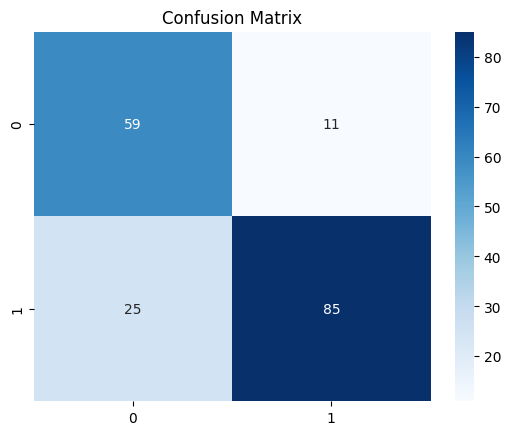

Accuracy: 0.74
Precision: 0.74
Recall: 0.74
F1-score: 0.74
SVC Cross-Validation Accuracy: 0.69


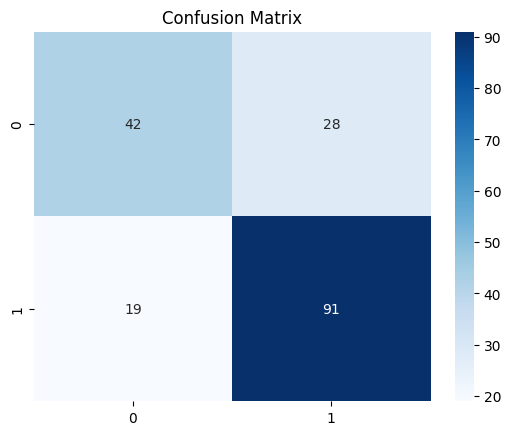

Accuracy: 0.87
Precision: 0.87
Recall: 0.87
F1-score: 0.87
RandomForestClassifier Cross-Validation Accuracy: 0.82


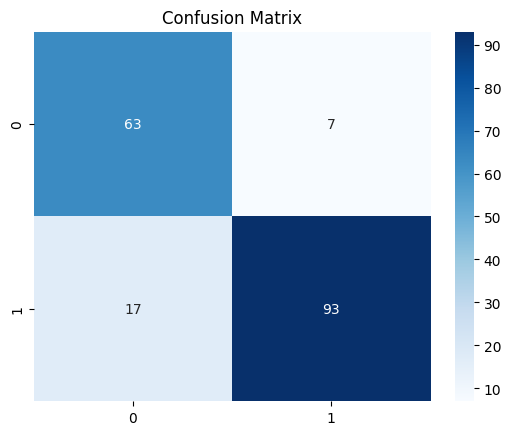

Accuracy: 0.88
Precision: 0.89
Recall: 0.88
F1-score: 0.88
GradientBoostingClassifier Cross-Validation Accuracy: 0.81


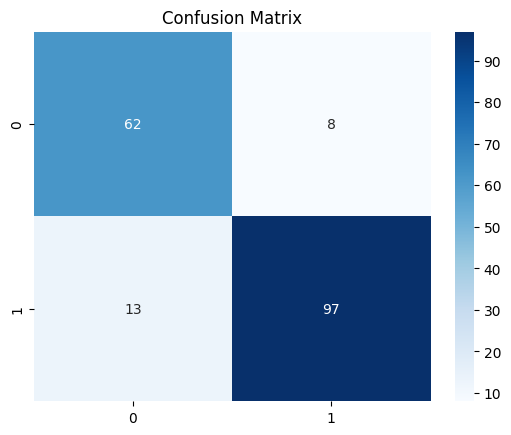

Accuracy: 0.83
Precision: 0.85
Recall: 0.83
F1-score: 0.83
KNeighborsClassifier Cross-Validation Accuracy: nan


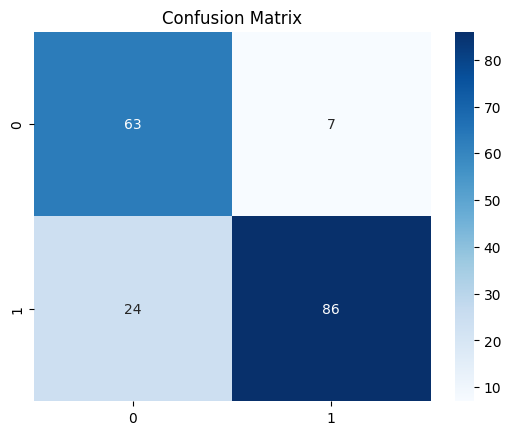

In [32]:
for model in [decision_tree_result, support_vector_result, random_forest_result, gradient_boosting_result, nearest_neighbour_result]:
    model_evaluation_comparison(model, X_test, y_test)